## Notebook: using jsonstat.py python library

This Jupyter notebook shows the python library [jsonstat.py](http://github.com/26fe/jsonstat.py) in action. The [JSON-stat](https://json-stat.org/) is a simple lightweight JSON dissemination format. This example shows how to explore the jsonstat data file [oecd-canada](http://json-stat.org/samples/oecd-canada.json) from json-stat.org site.

In [1]:
from __future__ import print_function
import os
import pandas as ps # using panda to convert jsonstat dataset to pandas dataframe
import jsonstat # import jsonstat.py package

Download or use cached file oecd-canada.json.

In [2]:
url = 'http://json-stat.org/samples/oecd-canada.json'
file_name = "oecd-canada.json"

file_path = os.path.abspath(os.path.join("..", "tests", "fixtures", "collection", file_name))
if os.path.exists(file_path):
    print("using file from fixtures")
else:
    print("download file into the current directory")
    jsonstat.download(url, file_name)
    file_path = file_name

using file from fixtures


Initialize JsonStatCollection from the file and print some info.

In [3]:
collection = jsonstat.JsonStatCollection()
collection.from_file(file_path)
collection.info()

0: dataset 'oecd'
1: dataset 'canada'



In [4]:
oecd = collection.dataset('oecd')
print("*** dataset '{} info".format(oecd.name()))
oecd.info()

*** dataset 'oecd info
name:   'oecd'
label:  'Unemployment rate in the OECD countries 2003-2014'
source: 'Unemployment rate in the OECD countries 2003-2014'
size: 432
3 dimensions:
  0: dim id/name: 'concept' size: '1' role: 'metric'
  1: dim id/name: 'area' size: '36' role: 'geo'
  2: dim id/name: 'year' size: '12' role: 'time'



In [5]:
for d in oecd.dimensions():
    print("*** info for dimensions '{}'".format(d.name()))
    d.info()

*** info for dimensions 'concept'
index
  pos    idx  label
    0    UNR unemployment rate

*** info for dimensions 'area'
index
  pos    idx  label
    0     AU Australia
    1     AT Austria
    2     BE Belgium
    3     CA Canada
    4     CL  Chile
    5     CZ Czech Republic
    6     DK Denmark
    7     EE Estonia
    8     FI Finland
    9     FR France
   10     DE Germany
   11     GR Greece
   12     HU Hungary
   13     IS Iceland
   14     IE Ireland
   15     IL Israel
   16     IT  Italy
   17     JP  Japan
   18     KR  Korea
   19     LU Luxembourg
   20     MX Mexico
   21     NL Netherlands
   22     NZ New Zealand
   23     NO Norway
   24     PL Poland
   25     PT Portugal
   26     SK Slovak Republic
   27     SI Slovenia
   28     ES  Spain
   29     SE Sweden
   30     CH Switzerland
   31     TR Turkey
   32     UK United Kingdom
   33     US United States
   34   EU15 Euro area (15 countries)
   35   OECD  total

*** info for dimensions 'year'
index
  pos   

Print the value in oecd dataset for area = IT and year = 2012

In [6]:
oecd.value(area='IT', year='2012')

10.55546863

Extract a subset of data in a pandas dataframe from the jsonstat dataset:

In [7]:
df = oecd.to_data_frame('year', content='id', blocked_dims={'area':'CA'})
df.tail()

,concept,area,Value
year,,,
2010,UNR,CA,7.988900
2011,UNR,CA,7.453610
2012,UNR,CA,7.323584
2013,UNR,CA,7.169742
2014,UNR,CA,6.881227


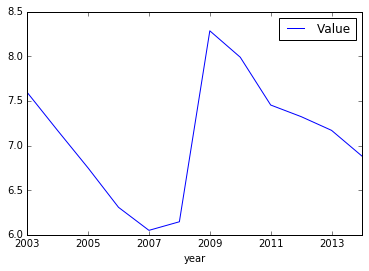

In [8]:
import matplotlib as plt
%matplotlib inline
df.plot()

In [9]:
oecd.to_table()[:5]

[[u'indicator', u'OECD countries, EU15 and total', u'2003-2014', u'Value'],
 [u'unemployment rate', u'Australia', u'2003', 5.943826289],
 [u'unemployment rate', u'Austria', u'2003', 4.278559338],
 [u'unemployment rate', u'Belgium', u'2003', 8.158333333],
 [u'unemployment rate', u'Canada', u'2003', 7.594616751]]

In [10]:
order = [i.name() for i in oecd.dimensions()]
order = order[::-1]  # reverse list
order = oecd.from_vec_idx_to_vec_dim(order)
table = oecd.to_table(order=order)
table[:5]

[[u'indicator', u'OECD countries, EU15 and total', u'2003-2014', u'Value'],
 [u'unemployment rate', u'Australia', u'2003', 5.943826289],
 [u'unemployment rate', u'Australia', u'2004', 5.39663128],
 [u'unemployment rate', u'Australia', u'2005', 5.044790587],
 [u'unemployment rate', u'Australia', u'2006', 4.789362794]]

In [11]:
# oecd.value(concept='unemployment rate',area='Australia',year='2004') # 5.39663128
# TODO: use also label other than index
# TODO: better error message than 'Key Error'
oecd.value(concept='UNR',area='AU',year='2004')

5.39663128